In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from numpy import absolute

In [2]:
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Boostraping\PLSR\dataset.xlsx"
df = pd.read_excel(dataframe)
df.head()

,carotenoid,400,401,402,403,404,405,406,407,408,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,32.820871,0.065619,0.065127,0.065294,0.065634,0.065548,0.065315,0.065404,0.065966,0.066737,...,0.111850,0.111529,0.111054,0.111007,0.110787,0.110174,0.109856,0.109756,0.109782,0.109768
1,41.620088,0.069785,0.069826,0.070362,0.070876,0.070950,0.071029,0.071384,0.071899,0.071777,...,0.113591,0.114505,0.114394,0.113856,0.113320,0.112157,0.111929,0.112260,0.111867,0.112044
2,49.984771,0.063132,0.062747,0.062611,0.062457,0.062039,0.062145,0.062412,0.062598,0.062687,...,0.090129,0.090856,0.090595,0.089639,0.089578,0.089729,0.089387,0.089614,0.089466,0.087800
3,50.066686,0.047176,0.047795,0.048406,0.048725,0.048811,0.049058,0.049382,0.049676,0.049807,...,0.082908,0.081787,0.081613,0.081688,0.081208,0.080860,0.080834,0.080509,0.079817,0.079307
4,33.474561,0.054662,0.054591,0.054374,0.054462,0.055194,0.055425,0.055831,0.056427,0.055878,...,0.092096,0.091577,0.091319,0.091903,0.091800,0.091221,0.090924,0.090471,0.090164,0.090046


In [3]:
X_data = df.iloc[:, 1:]
y_data = df.iloc[:,0]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.30, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1, random_state=0)
RFReg.fit(X_train, y_train)
y_pred_RFReg = RFReg.predict(X_test)
from sklearn import metrics
r_square_rf = metrics.r2_score(y_test, y_pred_RFReg)
mse_rf = metrics.mean_squared_error(y_test, y_pred_RFReg)
print('r-square: ', r_square_rf)
print('mse-square: ', mse_rf)

r-square:  0.7127722497520078
mse-square:  492.64506056828196


In [5]:
rf_features = df.iloc[:, 1:]
features_list = list(rf_features.columns)
importances = list(RFReg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable:        608 Importance: 0.03
Variable:        609 Importance: 0.03
Variable:        709 Importance: 0.03
Variable:        526 Importance: 0.02
Variable:        562 Importance: 0.02
Variable:        565 Importance: 0.02
Variable:        573 Importance: 0.02
Variable:        588 Importance: 0.02
Variable:        589 Importance: 0.02
Variable:        708 Importance: 0.02
Variable:        710 Importance: 0.02
Variable:        713 Importance: 0.02
Variable:        512 Importance: 0.01
Variable:        519 Importance: 0.01
Variable:        520 Importance: 0.01
Variable:        521 Importance: 0.01
Variable:        522 Importance: 0.01
Variable:        524 Importance: 0.01
Variable:        525 Importance: 0.01
Variable:        527 Importance: 0.01
Variable:        544 Importance: 0.01
Variable:        554 Importance: 0.01
Variable:        558 Importance: 0.01
Variable:        560 Importance: 0.01
Variable:        561 Importance: 0.01
Variable:        563 Importance: 0.01
Variable:   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [31]:
impo=np.array(importances)
print(pd.DataFrame(np.vstack((np.array(features_list)[impo>0.01],impo[impo>0.01])).T))



        0         1
0   519.0  0.010297
1   520.0  0.011242
2   521.0  0.014606
3   522.0  0.010273
4   525.0  0.010728
5   526.0  0.024570
6   527.0  0.011902
7   560.0  0.012528
8   561.0  0.012097
9   562.0  0.020236
10  563.0  0.013295
11  565.0  0.016933
12  566.0  0.011407
13  573.0  0.017678
14  578.0  0.010962
15  588.0  0.016932
16  589.0  0.016934
17  594.0  0.012431
18  602.0  0.012599
19  604.0  0.011280
20  608.0  0.026522
21  609.0  0.034921
22  613.0  0.011514
23  699.0  0.010179
24  708.0  0.020208
25  709.0  0.028288
26  710.0  0.018182
27  711.0  0.010843
28  713.0  0.020823


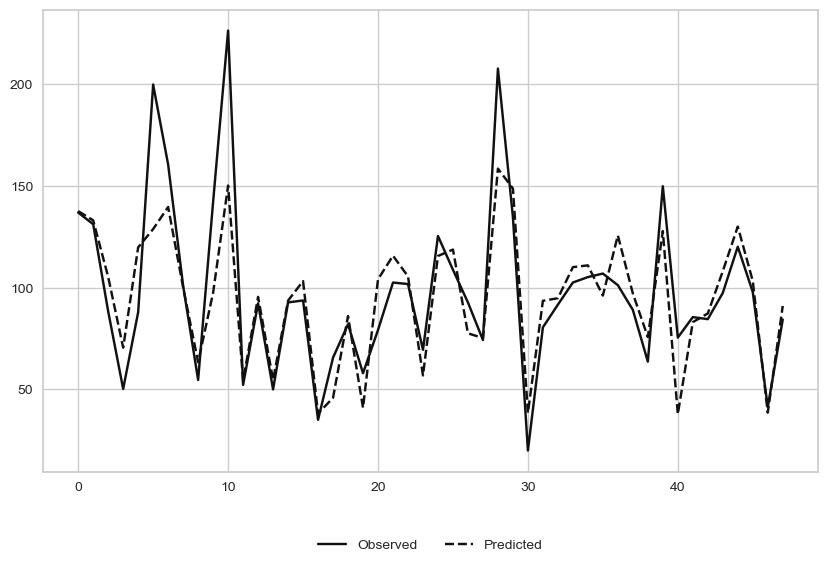

In [40]:
#plotting the observed and precticted data
# setting the boundaries and parameters 
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test))
#plotting
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, y_pred_RFReg, label = 'Predicted', color = 'k', linestyle = '--')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

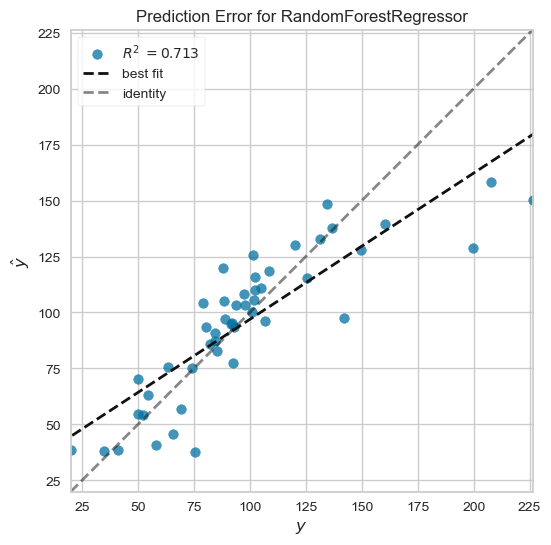

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [41]:
#plotting the prediction errors
visualizer = PredictionError(RFReg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

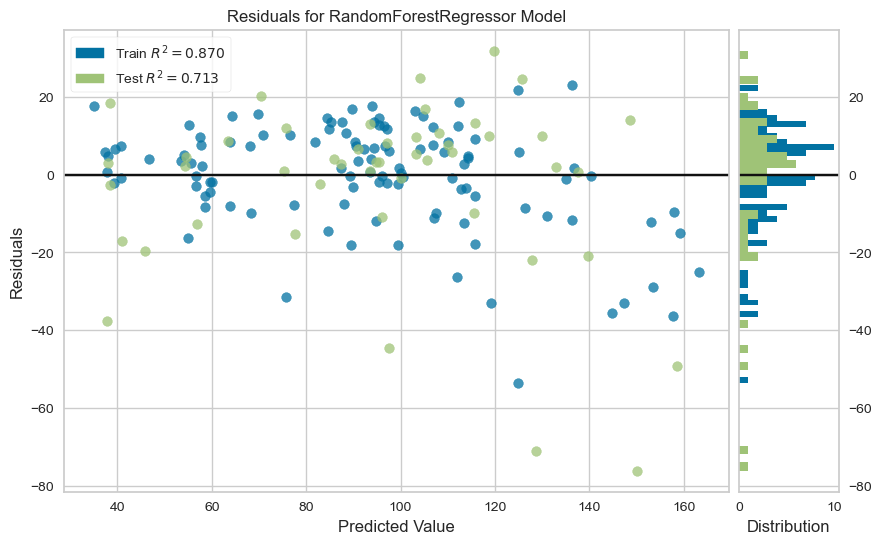

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
#Plotting Residuals
visualizer = ResidualsPlot(RFReg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [46]:
#The k-fold cv
score_train = cross_val_score(RFReg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
score_train

array([ -393.52071607,  -746.6630818 , -1183.43532469,  -425.05119406,
        -308.06800537,  -350.53931839,  -125.40852463,  -711.88978084,
        -286.70575674,  -274.48392018])

In [47]:
#The mean score 
print(np.mean(score_train))

-480.57656227572744


In [52]:
#The absolute mean score 

print(absolute(np.mean(score_train)))

480.57656227572744


In [53]:
#The testing model CV
score_test = cross_val_score(RFReg, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 10)
score_test

array([ -572.64880372, -1639.96492927, -2818.79365865,  -108.5837255 ,
        -841.34296964, -1083.57759326,  -376.95976207,   -68.75129536,
        -360.95793369,  -358.55455647])

In [54]:
#The absolute mean score 

print(absolute(np.mean(score_test)))

823.01352276183


# Model with best performing bands

In [32]:
# Split data into features (X) and response (y)
X = df[[519, 520, 525, 526, 527, 560, 561, 562, 563, 565, 566, 573, 578, 588, 589, 594, 602, 604, 608, 609, 613, 699, 708, 709, 710, 711, 713]]
y = df[["carotenoid"]]

In [40]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=10, max_depth=3, n_jobs=-1, random_state=0)
RFReg.fit(X, y)
y_pred_RFReg = RFReg.predict(X)
from sklearn import metrics
r_square_rf = metrics.r2_score(y, y_pred_RFReg)
mse_rf = metrics.mean_squared_error(y, y_pred_RFReg)
print('r-square: ', r_square_rf)
print('mse-square: ', mse_rf)

r-square:  0.6798763584228786
mse-square:  486.3261748921066


C:\Users\bongo\AppData\Local\Temp\ipykernel_25772\2253727217.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFReg.fit(X, y)
